<a href="https://colab.research.google.com/github/suyash-jamdade/MachineLearning/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")


In [0]:
 iris = datasets.load_iris()

In [0]:
X = iris.data[: ,:2]
y = iris.target

In [0]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

y_min, y_max = X[:, 1].min() - 1, X[:, 0].max() + 1

h = (x_max / x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [11]:
 from sklearn.svm import SVC
 svc = SVC()
 svc.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

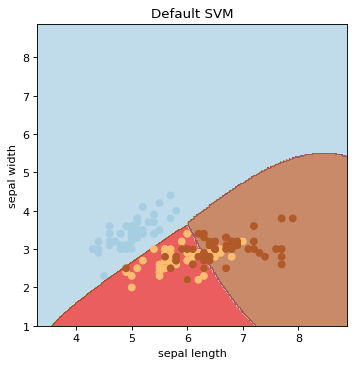

In [13]:
plt.figure(figsize = (5,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Default SVM')
plt.show()

In [14]:
 svc = SVC(kernel = 'linear')
 svc.fit(X, y)
 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

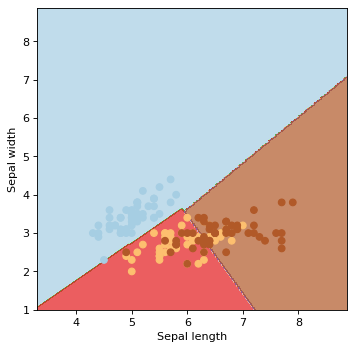

In [15]:
plt.figure(figsize = (5,5), dpi =80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X[:, 0], X[:, 1] , c =y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.show()

In [17]:
svc = SVC(kernel = 'poly')
svc.fit(X ,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

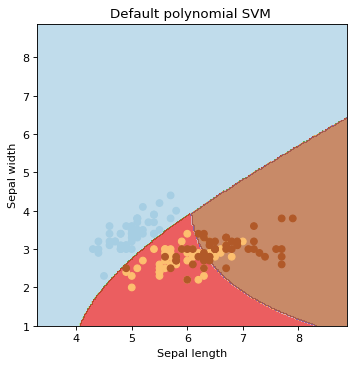

In [18]:
plt.figure(figsize = (5,5), dpi =80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X[:, 0], X[:, 1] , c =y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Default polynomial SVM ')
plt.show()

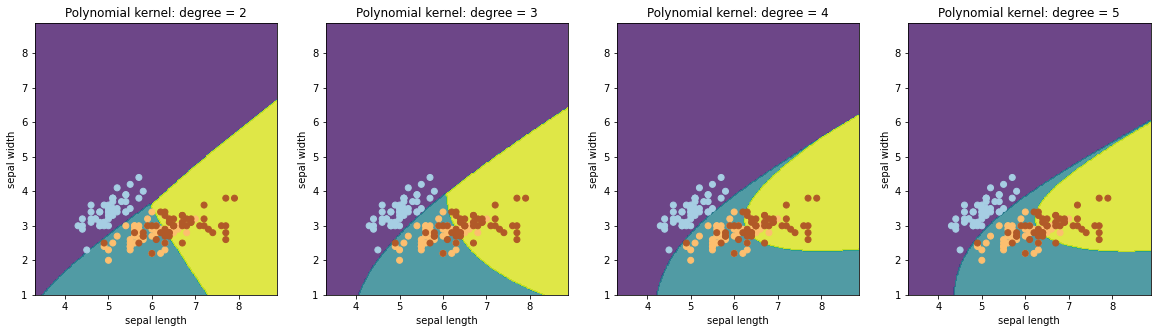

In [21]:
plt.figure(figsize = (20,5))

for i in range(2,6):
  svc = SVC(kernel = 'poly', degree = i)
  svc.fit(X, y)

  plt.subplot(1,4,i-1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmp=plt.cm.Paired, alpha=0.8)

  plt.scatter(X[:, 0], X[:, 1] , c =y, cmap=plt.cm.Paired)
  plt.xlabel('sepal length')
  plt.ylabel('sepal width')
  plt.xlim(xx.min(),xx.max())
  plt.title('Polynomial kernel: degree = ' + str(i))

plt.show()

In [22]:
 svc = SVC(kernel = 'rbf')
 svc.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

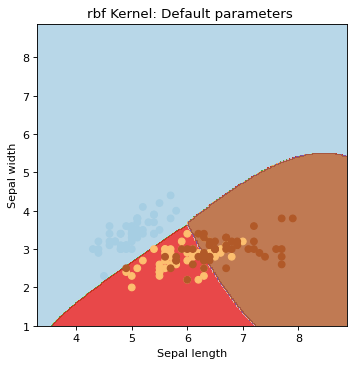

In [24]:
plt.figure(figsize = (5,5), dpi =80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1] , c =y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('rbf Kernel: Default parameters ')
plt.show()

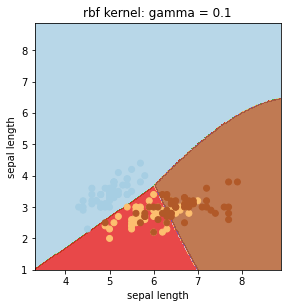

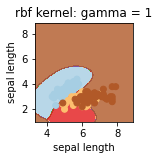

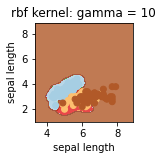

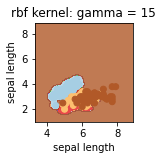

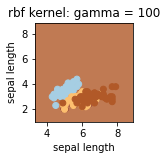

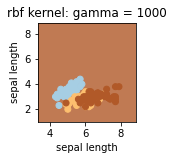

In [27]:
plt.figure(figsize = (15,10))

g = [0.1,1,10,15,100,1000]
for i in range(len(g)):
  svc = SVC(kernel = 'rbf', gamma = g[i])
  svc.fit(X, y)

  plt.subplot(2,3, i+1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z,cmap=plt.cm.Paired, alpha=0.8)

  plt.scatter(X[: ,0],X[:, 1] , c =y,cmap=plt.cm.Paired)
  plt.xlabel("sepal length")
  plt.ylabel("sepal width")
  plt.xlim(xx.min(), xx.max())
  plt.title('rbf kernel: gamma = '+ str(g[i]))

  plt.show()

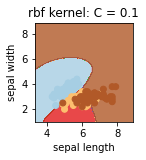

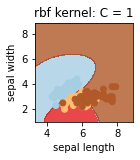

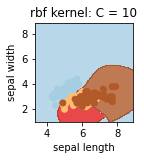

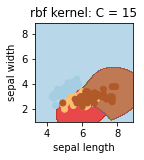

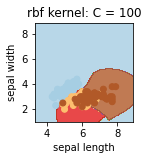

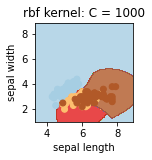

In [29]:
c = [0.1,1,10,15,100,1000]
for i in range(len(c)):
  svc = SVC(kernel = 'rbf', C =c[i], gamma = 0.5)
  svc.fit(X, y)
  plt.subplot(2,3, i+1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z,cmap=plt.cm.Paired, alpha=0.8)

  plt.scatter(X[: ,0],X[:, 1] , c =y,cmap=plt.cm.Paired)
  plt.xlabel("sepal length")
  plt.ylabel("sepal width")
  plt.xlim(xx.min(), xx.max())
  plt.title('rbf kernel: C = '+ str(g[i]))

  plt.show()

In [0]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris

In [96]:
dir(iris)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [33]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [40]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [42]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [45]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
df2.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


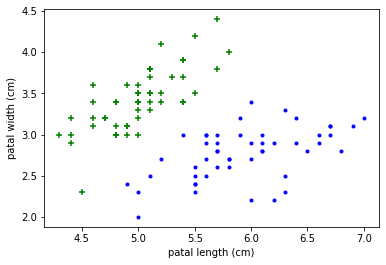

In [52]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color='blue',marker='.')

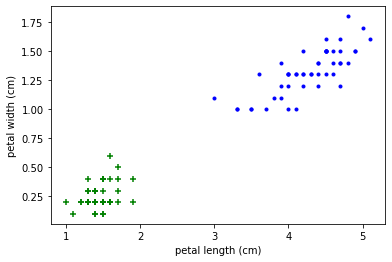

In [53]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='blue',marker='.')

In [0]:
from sklearn.model_selection import train_test_split

In [58]:
X = df.drop(['target','flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
y =df.target


In [0]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [63]:
len(X_train)

120

In [64]:
len(X_test)

30

In [0]:
from sklearn.svm import SVC
model = SVC(gamma=100)

In [82]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
model.score(X_test,y_test)

0.5333333333333333

In [84]:
model.score(X_train,y_train)

1.0